In [27]:
import pandas as pd
import numpy as np
import re

from pycaret.classification import *

import mlflow 

In [2]:
df = pd.read_csv('../data/preprocessing_train.csv')

In [3]:
def clean_feature_names(df):
    df.columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col) for col in df.columns]
    return df

In [9]:
best_features = pd.read_csv('../data/df_best_features.csv')
df = clean_feature_names(best_features)

In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [26]:
mlflow.set_tracking_uri('http://127.0.0.1:5000/')

# Créer une nouvelle expérience
experiment_id = mlflow.create_experiment('Pycaret')

with mlflow.start_run(experiment_id=experiment_id, run_name="Compare models"):
    clf1 = setup(df, target='TARGET', log_experiment=True, experiment_name='Pycaret')
    best_model = compare_models()

,Description,Value
0,Session id,4565
1,Target,TARGET
2,Target type,Binary
3,Original data shape,"(307507, 161)"
4,Transformed data shape,"(307507, 161)"
5,Transformed train set shape,"(215254, 161)"
6,Transformed test set shape,"(92253, 161)"
7,Numeric features,160
8,Rows with missing values,100.0%
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9197,0.7793,0.0369,0.5408,0.0691,0.0594,0.1256,3.4310
gbc,Gradient Boosting Classifier,0.9196,0.7697,0.0196,0.5542,0.0379,0.0325,0.0929,61.6480
rf,Random Forest Classifier,0.9194,0.7267,0.0021,0.7908,0.0041,0.0037,0.0372,25.2170
et,Extra Trees Classifier,0.9194,0.7293,0.0015,0.7264,0.0030,0.0027,0.0298,17.0880
ridge,Ridge Classifier,0.9193,0.0000,0.0003,0.2650,0.0006,0.0004,0.0066,0.5810
dummy,Dummy Classifier,0.9193,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5180
lr,Logistic Regression,0.9191,0.6545,0.0003,0.1077,0.0007,0.0002,0.0017,18.7270
ada,Ada Boost Classifier,0.9191,0.7585,0.0319,0.4870,0.0599,0.0505,0.1086,12.8190
xgboost,Extreme Gradient Boosting,0.9186,0.7698,0.0632,0.4697,0.1113,0.0940,0.1495,40.9660
lda,Linear Discriminant Analysis,0.9181,0.7609,0.0489,0.4351,0.0879,0.0728,0.1244,4.2530


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

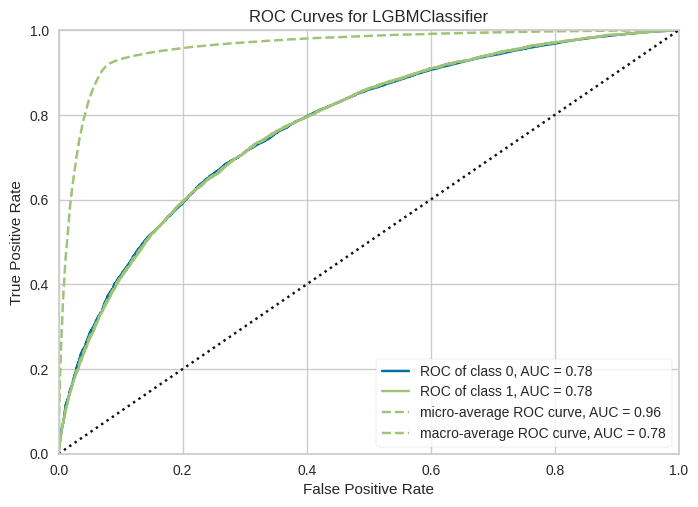

In [31]:
plot_model(best_model, plot = 'auc')

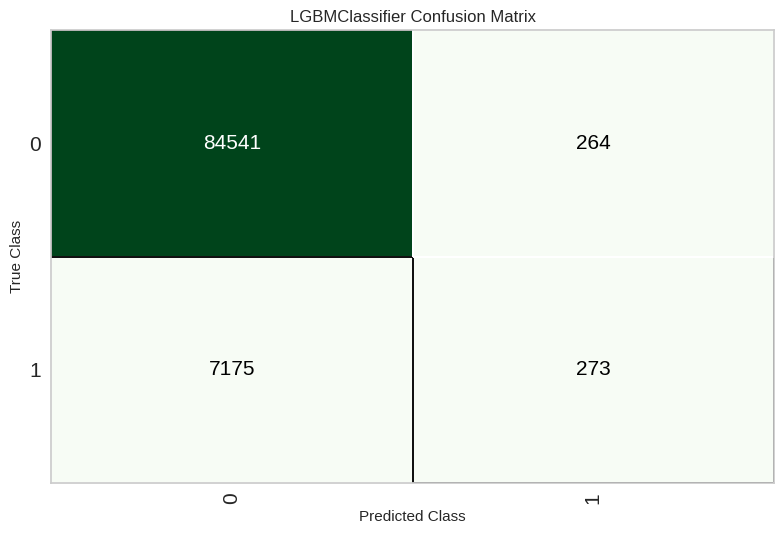

In [32]:
# OOP API
plot_model(best_model, plot = 'confusion_matrix')

## Save model

In [33]:
save_model(best_model, '../models/my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['EXT_SOURCE_3', 'EXT_SOURCE_2',
                                              'EXT_SOURCE_1', 'PAYMENT_RATE',
                                              'DAYS_EMPLOYED', 'INSTAL_DPD_MEAN',
                                              'DAYS_BIRTH',
                                              'NAME_EDUCATION_TYPE_Higher_education',
                                              'CODE_GENDER',
                                              'APPROVED_CNT_PAYMENT_MEAN',
                                              'AMT_ANNUITY', 'POS_COUNT',
                                              'PREV_DAYS_DECISION_MIN',
                                              'REF...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='spli